In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df = pd.read_excel('godigt_cc_data.xlsx')

In [5]:
df.drop('card_no',axis=1, inplace=True)

In [6]:
df.head()

,userid,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,438439,Visa,edge,2019-09-29,B,0,1,1,0,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,437748,Visa,prosperity,2002-10-30,A,1,1,1,0,...,52,0,0,0,0,0,R,280854,0,950000
2,3,437748,Visa,rewards,2013-10-05,C,0,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,425806,Visa,indianoil,1999-06-01,E,0,1,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,437748,Visa,edge,2006-06-13,B,1,1,1,0,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [7]:
df.shape

(8448, 27)

In [9]:
df.drop(['userid','card_bin_no'], axis=1, inplace=True)

In [10]:
df['Transactor_revolver'].unique()

array(['T', 'R', nan], dtype=object)

In [35]:
df['cc_limit'].mean()

251706.91287878787

In [29]:
df['Occupation_at_source'].unique()

array(['Self Employed', 0, 'Student', 'Salaried', 'Retired', 'Housewife'],
      dtype=object)

In [34]:
df[df['Occupation_at_source'] == 0]['Occupation_at_source'].count()

261

In [15]:
df['high_networth'].unique()

array(['B', 'A', 'C', 'E', 'D'], dtype=object)

In [14]:
df['card_type'].unique()

array(['edge', 'prosperity', 'rewards', 'indianoil', 'cashback',
       'shoprite', 'chartered', 'aura', 'gold', 'smartearn', 'prime',
       'pulse', 'platinum', 'centurion', 'elite'], dtype=object)

In [13]:
df['Issuer'].unique()

array(['Visa', 'Mastercard', 'Amex'], dtype=object)

In [12]:
df['Transactor_revolver'].isnull().sum()

38

In [22]:
df['card_source_date'].max()

Timestamp('2020-06-17 00:00:00')

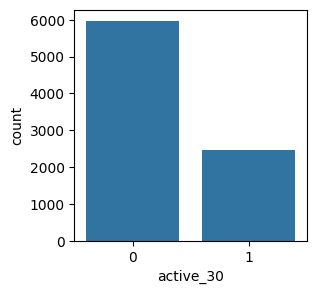

In [146]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='active_30');

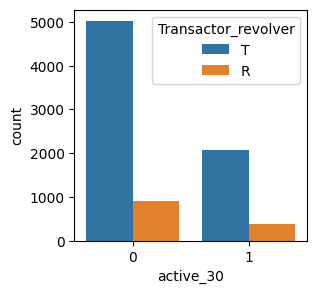

In [147]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='active_30', hue='Transactor_revolver');

In [148]:
(pd.crosstab(index=df['active_30'], columns=df['Transactor_revolver'], normalize='index', margins=True)*100).round(1)

Transactor_revolver,R,T
active_30,,
0,15.4,84.6
1,15.4,84.6
All,15.4,84.6


In [38]:
df[df['active_30']==1]['active_30'].count()
df[df['active_60']==1]['active_60'].count()
df[df['active_90']==1]['active_90'].count()

2470

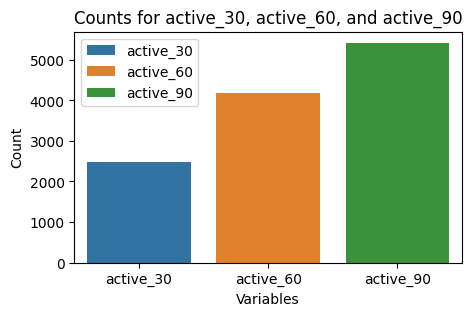

In [40]:
plt.figure(figsize=(5, 3))

# Plot counts for 'active_30'
sns.barplot(x=['active_30'], y=[df[df['active_30'] == 1]['active_30'].count()], label='active_30')

# Plot counts for 'active_60'
sns.barplot(x=['active_60'], y=[df[df['active_60'] == 1]['active_60'].count()], label='active_60')

# Plot counts for 'active_90'
sns.barplot(x=['active_90'], y=[df[df['active_90'] == 1]['active_90'].count()], label='active_90')

# Customize the chart
plt.title('Counts for active_30, active_60, and active_90')
plt.xlabel('Variables')
plt.ylabel('Count')
plt.legend()

# Show the combined plot
plt.show()

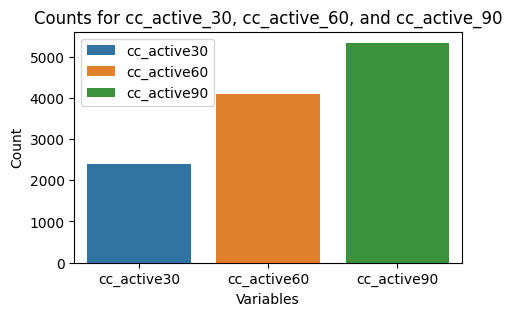

In [46]:
plt.figure(figsize=(5, 3))

# Plot counts for 'active_30'
sns.barplot(x=['cc_active30'], y=[df[df['cc_active30'] == 1]['cc_active30'].count()], label='cc_active30')

# Plot counts for 'active_60'
sns.barplot(x=['cc_active60'], y=[df[df['cc_active60'] == 1]['cc_active60'].count()], label='cc_active60')

# Plot counts for 'active_90'
sns.barplot(x=['cc_active90'], y=[df[df['cc_active90'] == 1]['cc_active90'].count()], label='cc_active90')

# Customize the chart
plt.title('Counts for cc_active_30, cc_active_60, and cc_active_90')
plt.xlabel('Variables')
plt.ylabel('Count')
plt.legend()

# Show the combined plot
plt.show()

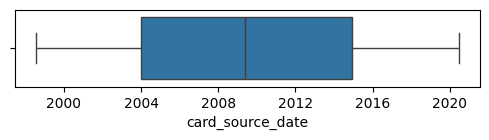

In [44]:
plt.figure(figsize=(6,1));
sns.boxplot(data=df, x='card_source_date');

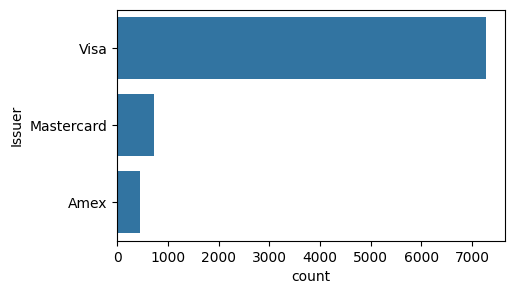

In [144]:
plt.figure(figsize=(5,3))
sns.countplot(df['Issuer']);

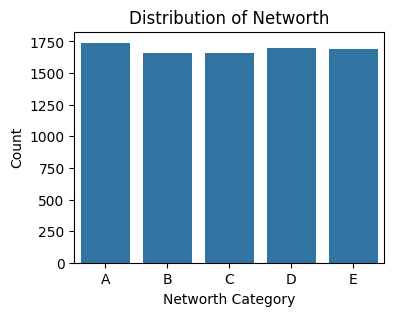

In [81]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='high_networth', order=sorted(df['high_networth'].unique()));
plt.title("Distribution of Networth")
plt.ylabel('Count')
plt.xlabel('Networth Category');

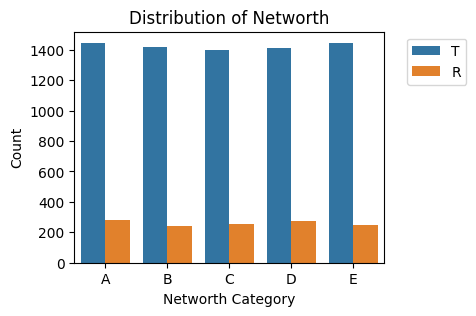

In [141]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='high_networth', order=sorted(df['high_networth'].unique()), hue='Transactor_revolver');
plt.title("Distribution of Networth")
plt.ylabel('Count')
plt.xlabel('Networth Category');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [47]:
df[df['hotlist_flag'] == 'Y']['hotlist_flag'].count()

38

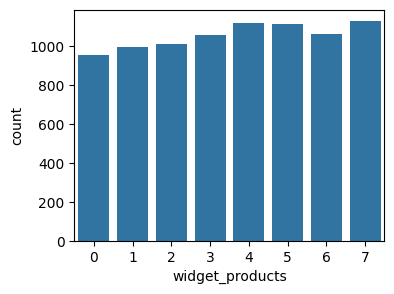

In [136]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='widget_products', order=sorted(df['widget_products'].unique()));

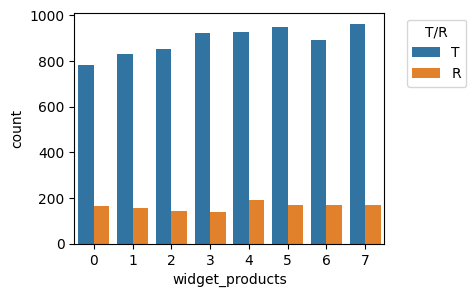

In [137]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='widget_products', order=sorted(df['widget_products'].unique()), hue='Transactor_revolver');
plt.legend(title='T/R', bbox_to_anchor=(1.05, 1), loc='upper left');

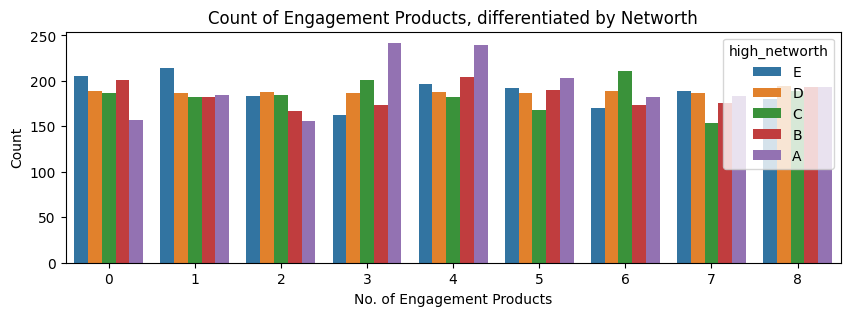

In [84]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, x='engagement_products', order=sorted(df['engagement_products'].unique()), hue='high_networth');
plt.title("Count of Engagement Products, differentiated by Networth")
plt.ylabel('Count')
plt.xlabel('No. of Engagement Products');

In [55]:
import matplotlib.ticker as ticker

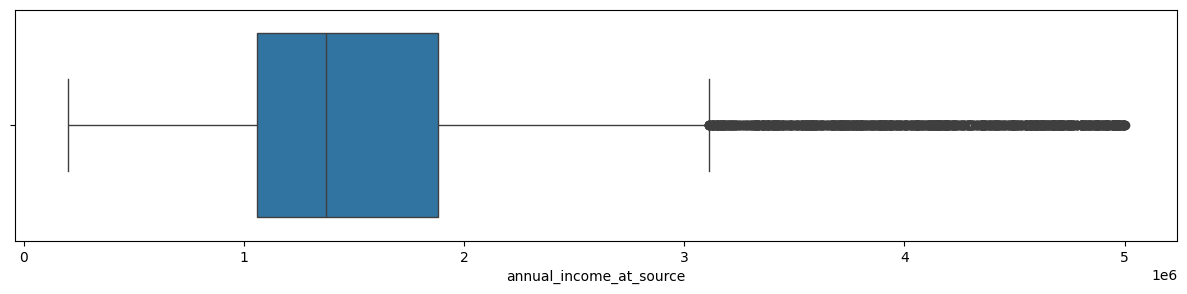

In [59]:
plt.figure(figsize=(15,3))
sns.boxplot(df['annual_income_at_source'], orient='h');

In [115]:
df[df['annual_income_at_source']>2000000]['annual_income_at_source'].count()

1629

In [117]:
df['annual_income_at_source'].median()

1372133.5

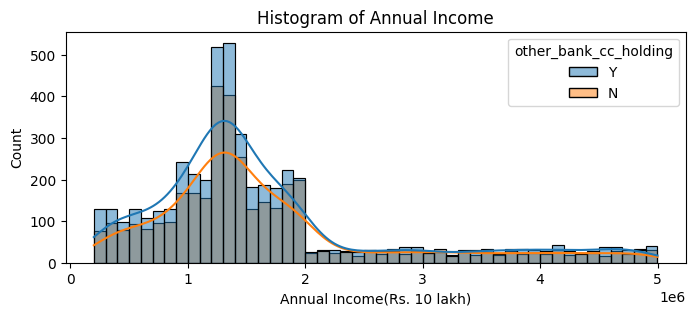

In [216]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='annual_income_at_source',hue='other_bank_cc_holding',binwidth= 100000, kde=True);
plt.title("Histogram of Annual Income")
plt.ylabel('Count')
plt.xlabel('Annual Income(Rs. 10 lakh)');

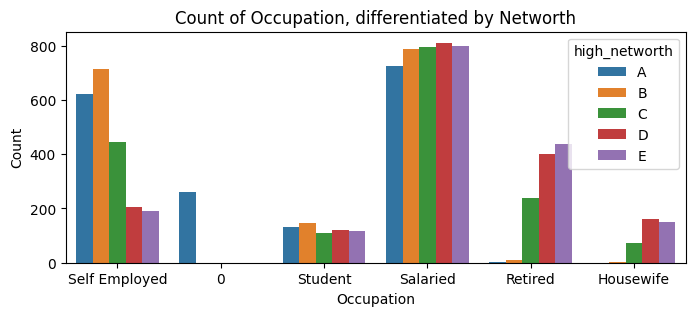

In [104]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x = df['Occupation_at_source'], hue='high_networth', hue_order=sorted(df['high_networth'].unique()));
plt.title("Count of Occupation, differentiated by Networth")
plt.ylabel('Count')
plt.xlabel('Occupation');

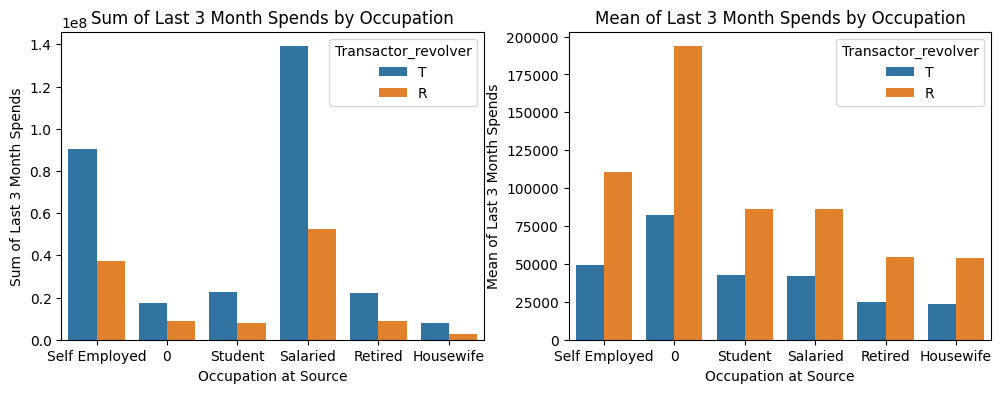

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.barplot(data=df, x='Occupation_at_source', y='avg_spends_l3m', estimator='sum', ax=axes[0], errorbar=None, hue='Transactor_revolver');
axes[0].set_title('Sum of Last 3 Month Spends by Occupation')
axes[0].set_xlabel('Occupation at Source')
axes[0].set_ylabel('Sum of Last 3 Month Spends')
sns.barplot(data=df, x='Occupation_at_source', y='avg_spends_l3m', estimator='mean', ax=axes[1], errorbar=None, hue='Transactor_revolver');
axes[1].set_title('Mean of Last 3 Month Spends by Occupation')
axes[1].set_xlabel('Occupation at Source')
axes[1].set_ylabel('Mean of Last 3 Month Spends');

In [95]:
df[df['Occupation_at_source']==0]['Occupation_at_source'].count()

261

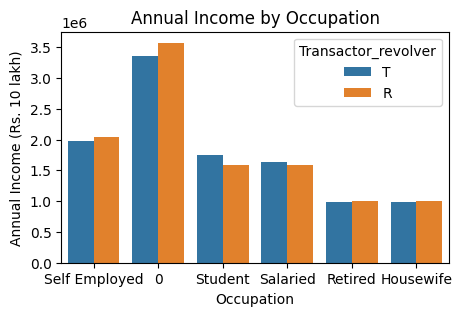

In [131]:
plt.figure(figsize=(5,3))
sns.barplot(data=df, x='Occupation_at_source', y='annual_income_at_source', errorbar=None, hue='Transactor_revolver');
plt.title("Annual Income by Occupation")
plt.ylabel('Annual Income (Rs. 10 lakh)')
plt.xlabel('Occupation');

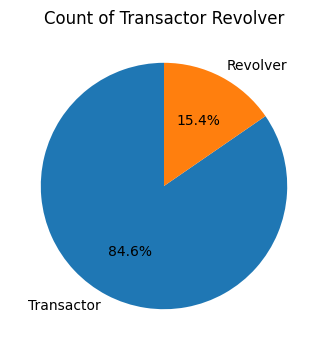

In [126]:
plt.figure(figsize=(4,4))
tr = df['Transactor_revolver'].value_counts(normalize=True) * 100
plt.pie(tr, labels=['Transactor','Revolver'], autopct='%1.1f%%', startangle=90);
plt.title('Count of Transactor Revolver');

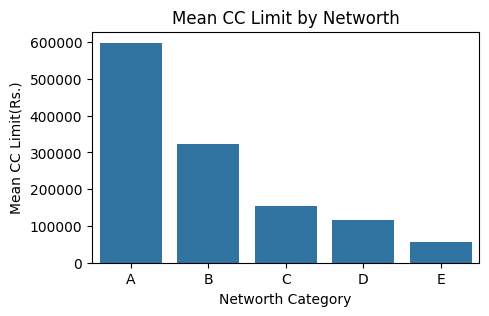

In [218]:
plt.figure(figsize=(5,3))
sns.barplot(data=df, x='high_networth', y='cc_limit', errorbar=None, order=sorted(df['high_networth'].unique()));
plt.title('Mean CC Limit by Networth')
plt.ylabel('Mean CC Limit(Rs.)')
plt.xlabel('Networth Category');

In [52]:
df_active = df[['active_30','active_60','active_90','cc_active30','cc_active60','cc_active90']]
df_active.head()

,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90
0,0,1,1,0,0,0
1,1,1,1,0,0,0
2,0,0,0,0,0,0
3,0,1,1,1,1,1
4,1,1,1,0,1,1


In [53]:
active_corr = df_active.corr()
active_corr

,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90
active_30,1.000000,0.649523,0.479956,0.008249,0.001719,-0.010189
active_60,0.649523,1.000000,0.738936,0.006037,0.000861,0.002859
active_90,0.479956,0.738936,1.000000,0.016475,0.013887,0.018534
cc_active30,0.008249,0.006037,0.016475,1.000000,0.649790,0.480340
cc_active60,0.001719,0.000861,0.013887,0.649790,1.000000,0.739223
cc_active90,-0.010189,0.002859,0.018534,0.480340,0.739223,1.000000


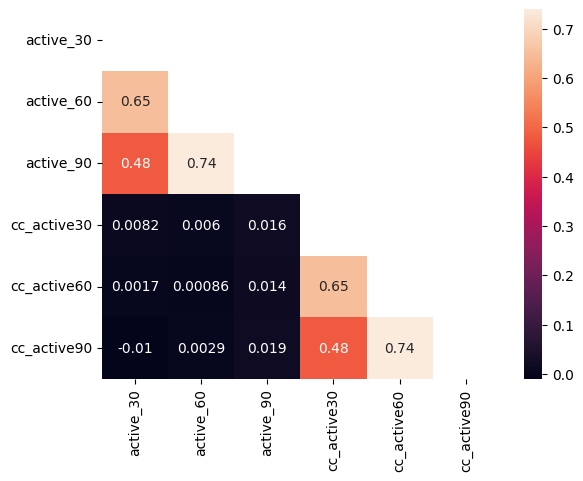

In [54]:
sns.heatmap(active_corr, annot=True, mask=np.triu(active_corr.corr()));

In [141]:
df_hnitr = df[['high_networth','Transactor_revolver']]
df_hnitr.head()

,high_networth,Transactor_revolver
0,B,T
1,A,R
2,C,R
3,E,T
4,B,T


In [17]:
(pd.crosstab(df['high_networth'],df['Transactor_revolver'] ,margins=True, normalize='index')*100).round(1)

Transactor_revolver,R,T
high_networth,,
A,16.3,83.7
B,14.4,85.6
C,15.3,84.7
D,16.4,83.6
E,14.5,85.5
All,15.4,84.6


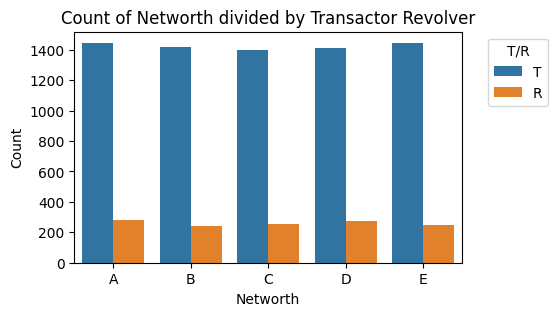

In [130]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='high_networth', order=sorted(df['high_networth'].unique()), hue='Transactor_revolver');
plt.title('Count of Networth divided by Transactor Revolver')
plt.ylabel('Count')
plt.xlabel('Networth');
plt.legend(title='T/R', bbox_to_anchor=(1.05, 1), loc='upper left');

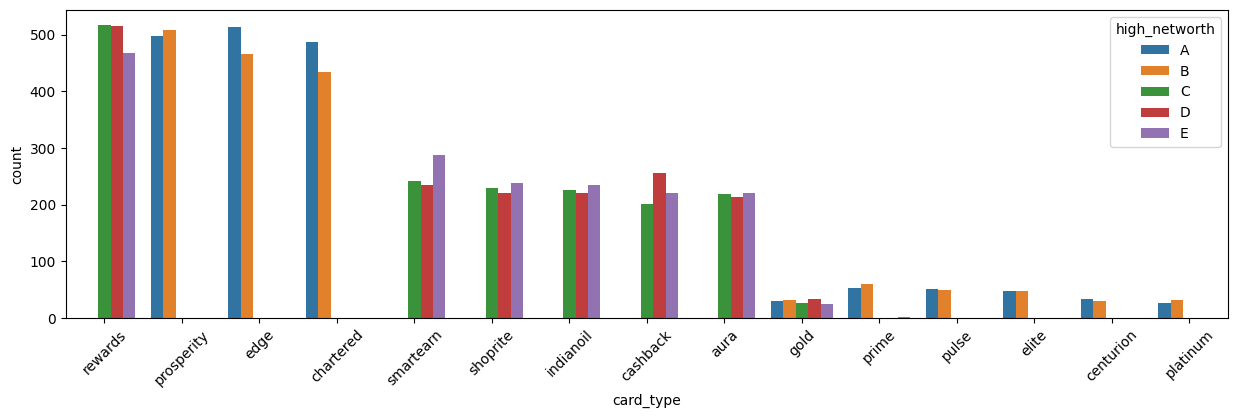

In [38]:
plt.figure(figsize=(15,4))
order = df['card_type'].value_counts().index
sns.countplot(data=df, x='card_type', order=order, hue='high_networth', hue_order=sorted(df['high_networth'].unique()));
plt.xticks(rotation=45);

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Issuer                   8448 non-null   object        
 1   card_type                8448 non-null   object        
 2   card_source_date         8448 non-null   datetime64[ns]
 3   high_networth            8448 non-null   object        
 4   active_30                8448 non-null   int64         
 5   active_60                8448 non-null   int64         
 6   active_90                8448 non-null   int64         
 7   cc_active30              8448 non-null   int64         
 8   cc_active60              8448 non-null   int64         
 9   cc_active90              8448 non-null   int64         
 10  hotlist_flag             8448 non-null   object        
 11  widget_products          8448 non-null   int64         
 12  engagement_products      8448 non-

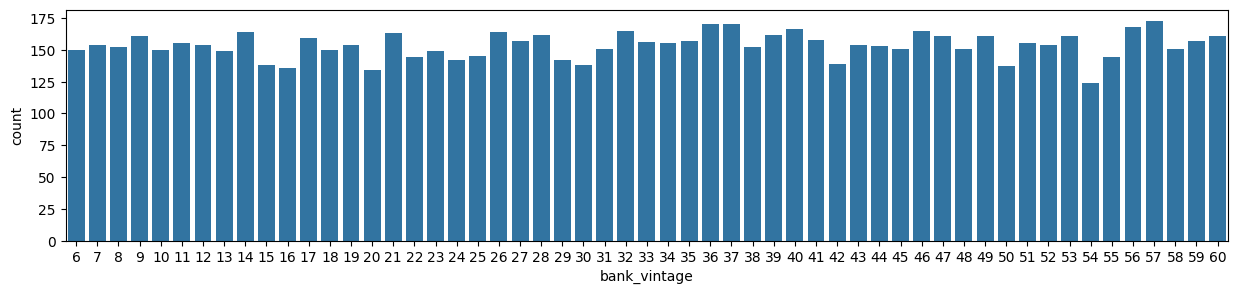

In [56]:
plt.figure(figsize=(15,3))
sns.countplot(data=df, x='bank_vintage');

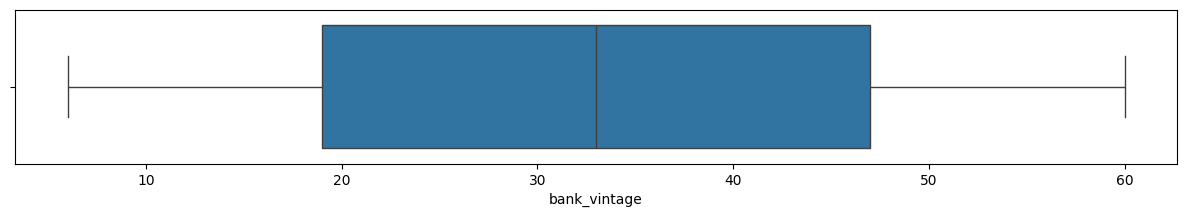

In [22]:
plt.figure(figsize=(15,2))
sns.boxplot(df['bank_vintage'], orient='h');

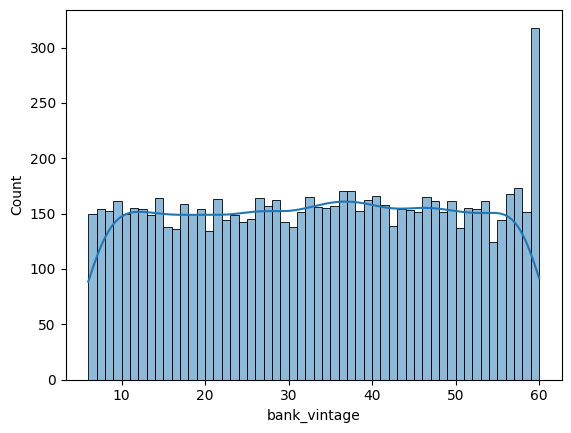

In [207]:
sns.histplot(df['bank_vintage'], binwidth=1, kde=True);

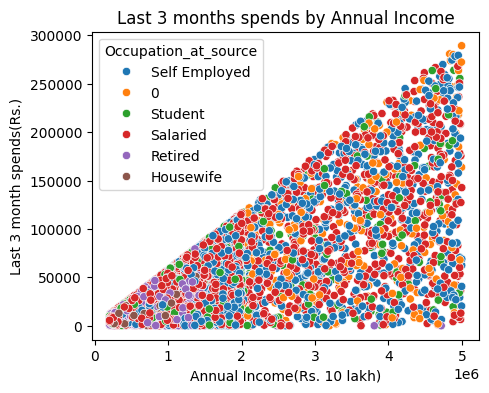

In [113]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y='avg_spends_l3m',x='annual_income_at_source', hue='Occupation_at_source');
plt.title('Last 3 months spends by Annual Income')
plt.ylabel('Last 3 month spends(Rs.)')
plt.xlabel('Annual Income(Rs. 10 lakh)');

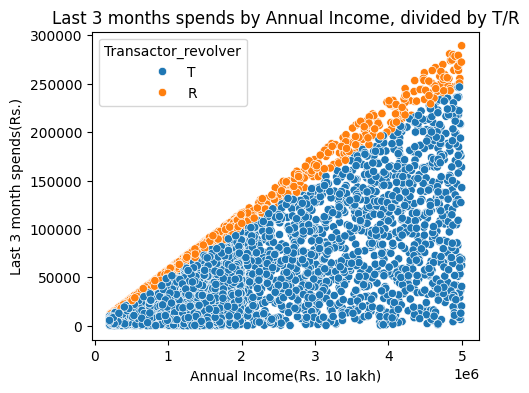

In [159]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y='avg_spends_l3m',x='annual_income_at_source', hue='Transactor_revolver');
plt.title('Last 3 months spends by Annual Income, divided by T/R')
plt.ylabel('Last 3 month spends(Rs.)')
plt.xlabel('Annual Income(Rs. 10 lakh)');

In [ ]:
plt.figure(figsize=(12,3))
sns.countplot(data=df, x='engagement_products',hue='high_networth', hue_order=sorted(df['high_networth'].unique()));

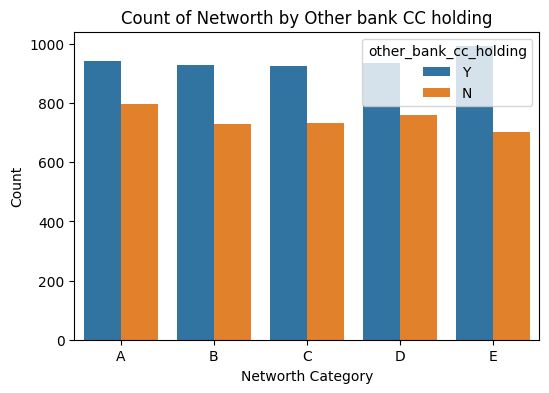

In [122]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='high_networth', order=sorted(df['high_networth'].unique()), hue='other_bank_cc_holding');
plt.title('Count of Networth by Other bank CC holding')
plt.ylabel('Count')
plt.xlabel('Networth Category');

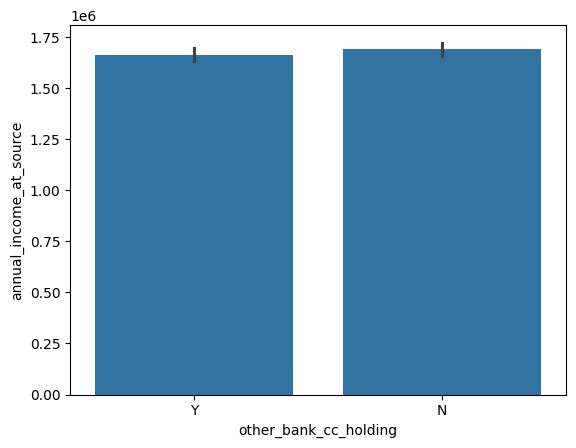

In [155]:
sns.barplot(data=df, x='other_bank_cc_holding', y='annual_income_at_source');

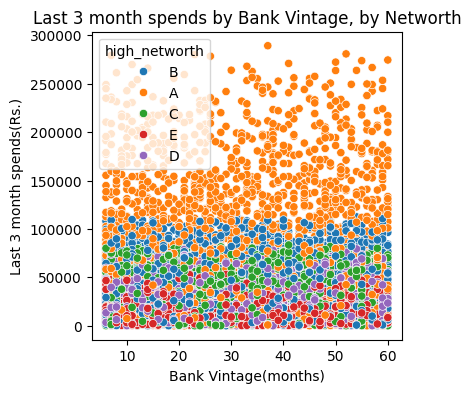

In [90]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, y='avg_spends_l3m',x='bank_vintage', hue='high_networth');
plt.title("Last 3 month spends by Bank Vintage, by Networth")
plt.ylabel('Last 3 month spends(Rs.)')
plt.xlabel('Bank Vintage(months)');

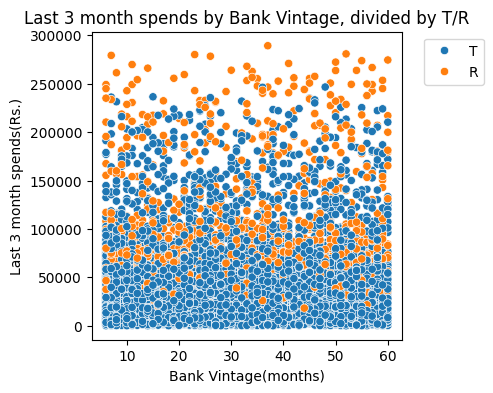

In [161]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, y='avg_spends_l3m',x='bank_vintage', hue='Transactor_revolver');
plt.title("Last 3 month spends by Bank Vintage, divided by T/R")
plt.ylabel('Last 3 month spends(Rs.)')
plt.xlabel('Bank Vintage(months)');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

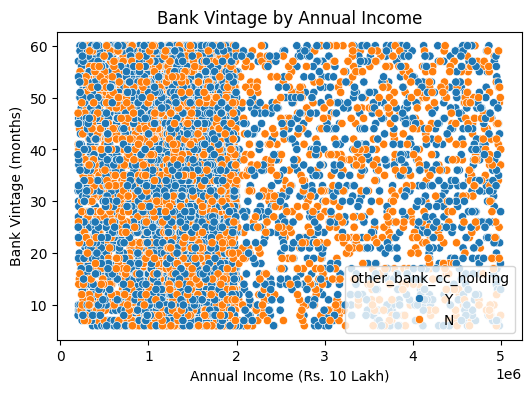

In [121]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='annual_income_at_source', y='bank_vintage', hue='other_bank_cc_holding');
plt.title('Bank Vintage by Annual Income')
plt.ylabel('Bank Vintage (months)')
plt.xlabel('Annual Income (Rs. 10 Lakh)');

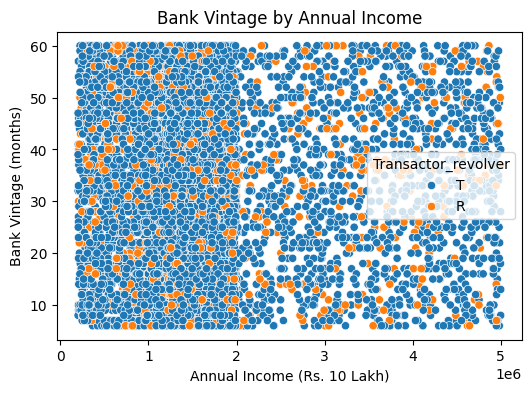

In [152]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='annual_income_at_source', y='bank_vintage', hue='Transactor_revolver');
plt.title('Bank Vintage by Annual Income')
plt.ylabel('Bank Vintage (months)')
plt.xlabel('Annual Income (Rs. 10 Lakh)');

In [170]:
def calculate_percentage_outliers(series):
    # Calculate the IQR (Interquartile Range)
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    # Define the upper bound for outliers
    upper_bound = q3 + 1.5 * iqr

    # Count the number of outliers on the right side
    outliers_right = series[series > upper_bound]

    # Calculate the percentage of outliers on the right side
    percentage_outliers_right = (outliers_right.count() / series.count()) * 100

    return percentage_outliers_right

# Calculate the percentage of outliers in the 'cc_limit' column on the right side
percentage_outliers_right = calculate_percentage_outliers(df['cc_limit'])

print(f"Percentage of outliers on the right side in 'cc_limit': {percentage_outliers_right:.2f}%")


Percentage of outliers on the right side in 'cc_limit': 6.61%


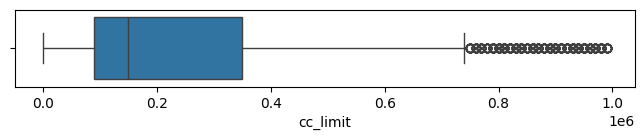

In [67]:
plt.figure(figsize=(8,1))
sns.boxplot(data=df, x='cc_limit');

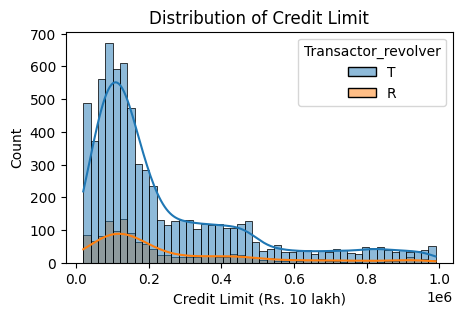

In [205]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='cc_limit', hue='Transactor_revolver',binwidth=20000, kde=True);
plt.title('Distribution of Credit Limit')
plt.ylabel('Count')
plt.xlabel('Credit Limit (Rs. 10 lakh)');

In [198]:
percentage_below_threshold = (df[df['cc_limit'] < 500000]['cc_limit'].count() / len(df)) * 100

print(f"Percentage of people below 500,000 in 'cc_limit': {percentage_below_threshold:.2f}%")

Percentage of people below 500,000 in 'cc_limit': 86.84%


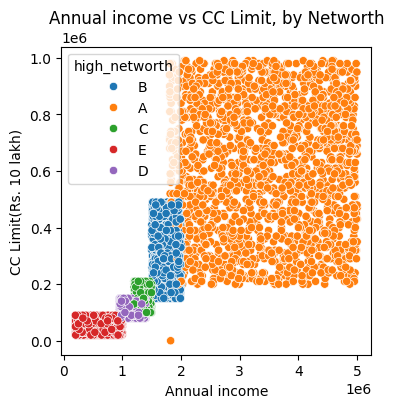

In [94]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='annual_income_at_source', y='cc_limit', hue='high_networth');
plt.title("Annual income vs CC Limit, by Networth")
plt.ylabel('CC Limit(Rs. 10 lakh)')
plt.xlabel('Annual income');

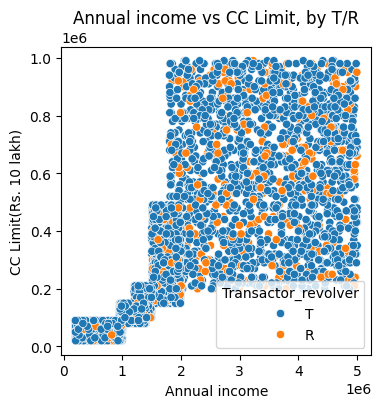

In [183]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='annual_income_at_source', y='cc_limit', hue='Transactor_revolver');
plt.title("Annual income vs CC Limit, by T/R")
plt.ylabel('CC Limit(Rs. 10 lakh)')
plt.xlabel('Annual income');

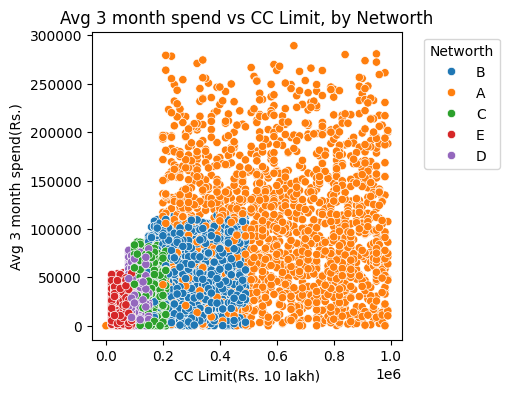

In [167]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, y='avg_spends_l3m', x='cc_limit', hue='high_networth');
plt.title("Avg 3 month spend vs CC Limit, by Networth")
plt.xlabel('CC Limit(Rs. 10 lakh)')
plt.ylabel('Avg 3 month spend(Rs.)');
plt.legend(title='Networth', bbox_to_anchor=(1.05, 1), loc='upper left');

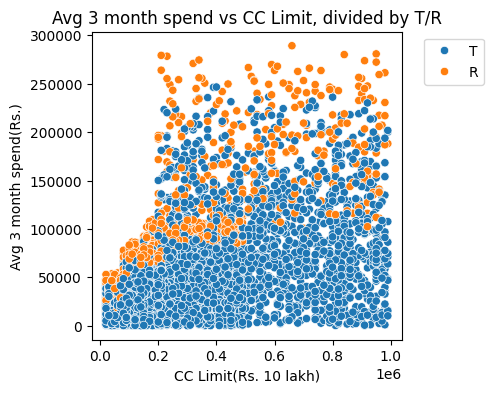

In [163]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, y='avg_spends_l3m', x='cc_limit', hue='Transactor_revolver');
plt.title("Avg 3 month spend vs CC Limit, divided by T/R")
plt.xlabel('CC Limit(Rs. 10 lakh)')
plt.ylabel('Avg 3 month spend(Rs.)');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

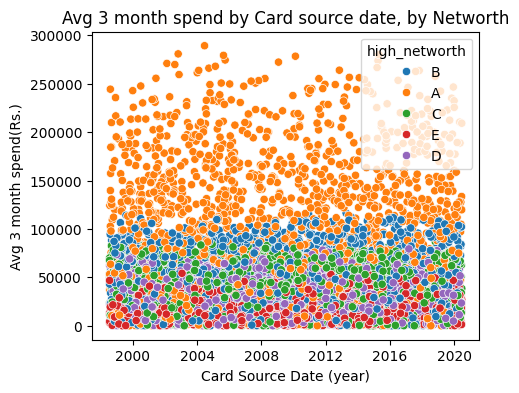

In [101]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y='avg_spends_l3m', x='card_source_date', hue='high_networth');
plt.title("Avg 3 month spend by Card source date, by Networth")
plt.xlabel('Card Source Date (year)')
plt.ylabel('Avg 3 month spend(Rs.)');

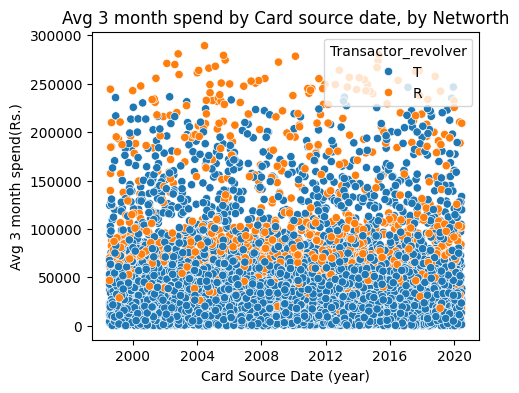

In [149]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y='avg_spends_l3m', x='card_source_date', hue='Transactor_revolver');
plt.title("Avg 3 month spend by Card source date, by Networth")
plt.xlabel('Card Source Date (year)')
plt.ylabel('Avg 3 month spend(Rs.)');

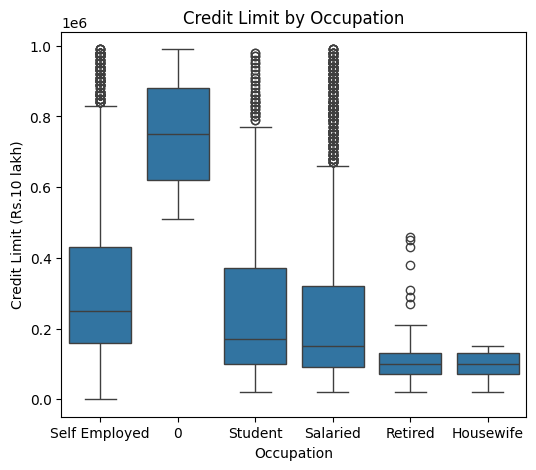

In [196]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Occupation_at_source', y='cc_limit');
plt.title('Credit Limit by Occupation')
plt.ylabel('Credit Limit (Rs.10 lakh)')
plt.xlabel('Occupation');

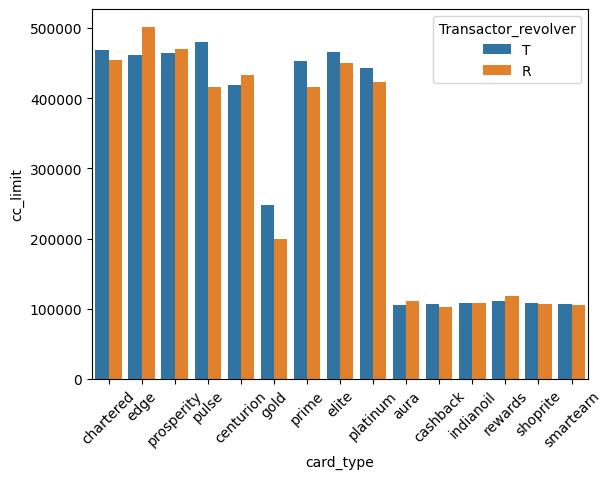

In [193]:
order = df.groupby('card_type')['cc_limit'].max().sort_values(ascending=False).index

sns.barplot(data=df, x='card_type', y='cc_limit', errorbar=None, order=order, hue='Transactor_revolver');
plt.xticks(rotation=45);

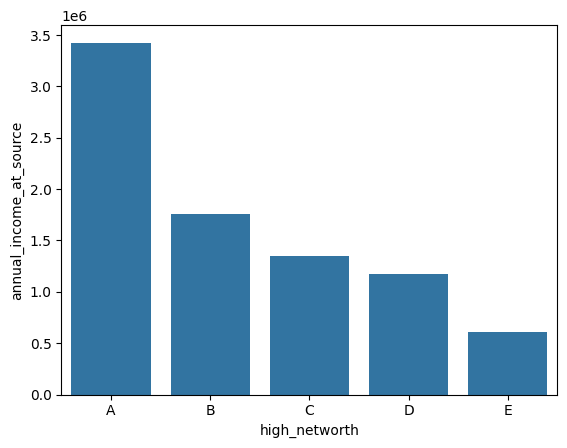

In [203]:
order1 = df.groupby('high_networth')['annual_income_at_source'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='high_networth', y='annual_income_at_source', errorbar=None, order=order1);